In [1]:
import WindyGridWorld
import random
import numpy as np
import matplotlib.pyplot as plt
import updaters

In [2]:
d=320
def getFeatures(state,action):
    vect = np.zeros((320,1))
    if action == actions[0]:
        act_val=0
    elif action == actions[1]:
        act_val=1
    elif action == actions[2]:
        act_val=2
    elif action == actions[3]:
        act_val=3
    else:
        print("UNKNOWN ACTION",action)
    s_val = state[0]+10*state[1]+act_val*80
    vect[s_val]=1
    return vect

In [3]:
def getQVal(features,weights):
    return np.matmul(features.reshape((1,d)),weights.reshape((d,1)))

In [4]:
mdp = WindyGridWorld.mdp()
actions = ["UP","DOWN","LEFT","RIGHT"]

In [5]:
# Initial Policy
epsillon = 0.1
weights = np.zeros((d,1))#np.array([random.uniform(-1,1) for i in range(d)]).reshape((d,1))
policy = {}
for i in range(10):
    for j in range(8):
        best = None
        best_action=None
        for a in actions:
            q = getQVal(getFeatures((i,j),a),weights)
            if best==None or q>best:
                best = q
                best_action = a
        policy[(i,j)]=best_action

In [6]:
# Exp policy fully random
b_prob = 1/4
# Current policy -> policy, with eps greedy action selection: Each non fav is with prob p = eps/4
p_fav = 1-epsillon+epsillon/4
p_others = epsillon/4
ratio_fav = p_fav/b_prob
ratio_others = p_others/b_prob
discount = 1.0

In [7]:
def improvePolicy():
    for i in range(10):
        for j in range(8):
            best = None
            best_action=None
            for a in actions:
                q = getQVal(getFeatures((i,j),a),weights)
                if best==None or q>best:
                    best = q
                    best_action = a
            policy[(i,j)]=best_action

In [8]:
def improvePolicyForOne(state):
    best = None
    best_action=None
    for a in actions:
        q = getQVal(getFeatures(state,a),weights)
        if best==None or q>best:
            best = q
            best_action = a
    policy[state]=best_action

In [9]:
mdp=WindyGridWorld.mdp()
num_eps =10
a=0.01
b=0.01
updater = updaters.GTD2(a,b,discount,dim=320)
for e in range(num_eps):
    state = mdp.getStartState()
    newFeatures = getFeatures(state,policy[state])
    i=0
    while 1:
        i+=1
        prev = state
        ac = random.choice(actions)
        if ac==policy[state]:
            ratio = ratio_fav
        else:
            ratio = ratio_others
        oldFeatures=newFeatures
        state,r = mdp.getTransition(state,ac)
        newFeatures = getFeatures(state,ac)
        weights=updater.update(oldFeatures,newFeatures,r,weights,ratio)
        improvePolicyForOne(prev)
        if r==0:
            break
    print(e,i)

0 181
1 6273
2 691
3 3346
4 6066
5 1877
6 8735
7 4482
8 13047
9 4872


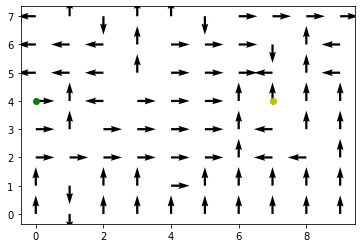

In [11]:
x1,y1 = np.meshgrid(np.arange(0, 10, 1), np.arange(0, 8, 1))
u = np.zeros(y1.shape)
v = np.zeros(y1.shape)
for i in range(10):
    for j in range(8):
        if policy[(i,j)]=="UP":
            u[j,i]=0
            v[j,i]=0.1
        elif policy[(i,j)]=="DOWN":
            u[j,i]=0
            v[j,i]=-0.1
        elif policy[(i,j)]=="RIGHT":
            u[j,i]=0.1
            v[j,i]=0
        elif policy[(i,j)]=="LEFT":
            u[j,i]=-0.1
            v[j,i]=0
        else:
            print("UNKNOWN ACTION",policy[(i,j)])


plt.quiver(x1,y1,u,v)
plt.plot(0,4,"go")
plt.plot(7,4,"yo")

In [12]:
for e in range(num_eps):
    state = mdp.getStartState()
    newFeatures = getFeatures(state,policy[state])
    i=0
    while 1:
        i+=1
        prev = state
        ac = random.choice(actions)
        if ac==policy[state]:
            ratio = ratio_fav
        else:
            ratio = ratio_others
        oldFeatures=newFeatures
        state,r = mdp.getTransition(state,ac)
        newFeatures = getFeatures(state,ac)
        weights=updater.update(oldFeatures,newFeatures,r,weights,ratio)
        improvePolicyForOne(prev)
        if r==0:
            break
    print(e,i)

0 1524
1 7234
2 6819
3 4834
4 3320
5 10432
6 2964
7 2270
8 3040
9 10543


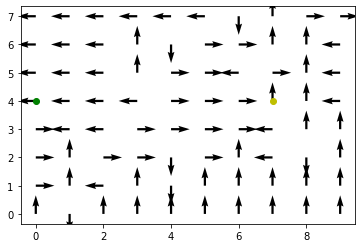

In [13]:
x1,y1 = np.meshgrid(np.arange(0, 10, 1), np.arange(0, 8, 1))
u = np.zeros(y1.shape)
v = np.zeros(y1.shape)
for i in range(10):
    for j in range(8):
        if policy[(i,j)]=="UP":
            u[j,i]=0
            v[j,i]=0.1
        elif policy[(i,j)]=="DOWN":
            u[j,i]=0
            v[j,i]=-0.1
        elif policy[(i,j)]=="RIGHT":
            u[j,i]=0.1
            v[j,i]=0
        elif policy[(i,j)]=="LEFT":
            u[j,i]=-0.1
            v[j,i]=0
        else:
            print("UNKNOWN ACTION",policy[(i,j)])


plt.quiver(x1,y1,u,v)
plt.plot(0,4,"go")
plt.plot(7,4,"yo")

In [14]:
num_eps=1000
for e in range(num_eps):
    state = mdp.getStartState()
    newFeatures = getFeatures(state,policy[state])
    i=0
    while 1:
        i+=1
        prev = state
        ac = random.choice(actions)
        if ac==policy[state]:
            ratio = ratio_fav
        else:
            ratio = ratio_others
        oldFeatures=newFeatures
        state,r = mdp.getTransition(state,ac)
        newFeatures = getFeatures(state,ac)
        weights=updater.update(oldFeatures,newFeatures,r,weights,ratio)
        improvePolicyForOne(prev)
        if r==0:
            break
    print(e,i)

0 12365
1 4038
2 1443
3 8521
4 5358
5 1593
6 10457
7 296
8 2520
9 3392
10 4867
11 1964
12 6471
13 4298
14 3582
15 23761
16 3433
17 2760
18 926
19 1276
20 39402
21 5117
22 689
23 9626
24 791
25 1247
26 7115
27 1003
28 1286
29 871
30 5328
31 3137
32 1916
33 5017
34 6904
35 6329
36 37143
37 3677
38 11285
39 17825
40 23197
41 1920
42 1235
43 11670
44 2210
45 3144
46 3780
47 11441
48 1577
49 6761
50 1595
51 1476
52 757
53 1136
54 4156
55 2831
56 3915
57 886
58 7468
59 10994
60 287
61 1734
62 6444
63 15710
64 7694
65 8767
66 6882
67 522
68 4630
69 1329
70 5757
71 2333
72 7976
73 15681
74 7125
75 10216
76 12088
77 5399
78 14192
79 490
80 328
81 2870
82 10531
83 8511
84 306
85 5329
86 6727
87 385
88 2107
89 429
90 8853
91 8132
92 13126
93 12905
94 191
95 7608
96 5763
97 382
98 7088
99 5674
100 342
101 4302
102 7375
103 765
104 6727
105 7830
106 771
107 897
108 1301
109 3400
110 1511
111 4858
112 3418
113 422
114 822
115 6659
116 3588
117 2411
118 13690
119 5942
120 11813
121 2238
122 8250
123 

918 10080
919 9172
920 137
921 820
922 1976
923 7779
924 9228
925 809
926 12539
927 2398
928 21873
929 2855
930 4693
931 6341
932 7613
933 474
934 3312
935 4122
936 3071
937 269
938 3445
939 7002
940 10111
941 7123
942 4898
943 3959
944 1482
945 14437
946 498
947 96
948 465
949 653
950 16085
951 3410
952 3787
953 1923
954 3142
955 6055
956 4371
957 11042
958 428
959 3192
960 11158
961 2007
962 4167
963 7878
964 6893
965 4933
966 5093
967 4502
968 1617
969 6778
970 2493
971 4495
972 13350
973 2067
974 9638
975 7400
976 2170
977 1374
978 448
979 3262
980 1635
981 379
982 1754
983 23957
984 3301
985 2918
986 5085
987 176
988 1709
989 9980
990 1070
991 1235
992 1729
993 576
994 3969
995 746
996 2907
997 3469
998 18821
999 1782


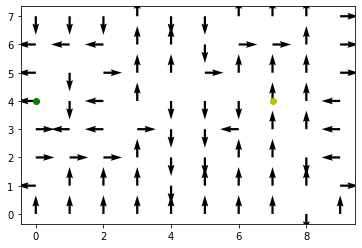

In [15]:
x1,y1 = np.meshgrid(np.arange(0, 10, 1), np.arange(0, 8, 1))
u = np.zeros(y1.shape)
v = np.zeros(y1.shape)
for i in range(10):
    for j in range(8):
        if policy[(i,j)]=="UP":
            u[j,i]=0
            v[j,i]=0.1
        elif policy[(i,j)]=="DOWN":
            u[j,i]=0
            v[j,i]=-0.1
        elif policy[(i,j)]=="RIGHT":
            u[j,i]=0.1
            v[j,i]=0
        elif policy[(i,j)]=="LEFT":
            u[j,i]=-0.1
            v[j,i]=0
        else:
            print("UNKNOWN ACTION",policy[(i,j)])


plt.quiver(x1,y1,u,v)
plt.plot(0,4,"go")
plt.plot(7,4,"yo")

In [16]:
num_eps=100
for e in range(num_eps):
    state = mdp.getStartState()
    newFeatures = getFeatures(state,policy[state])
    i=0
    while 1:
        i+=1
        prev = state
        if random.uniform(0,1)>epsillon:
            ac = policy[state]
        else:
            ac = random.choice(actions)
        ratio = 1.0
        oldFeatures=newFeatures
        state,r = mdp.getTransition(state,ac)
        newFeatures = getFeatures(state,ac)
        weights=updater.update(oldFeatures,newFeatures,r,weights,ratio)
        improvePolicyForOne(prev)
        if r==0:
            break
    print(e,i)

0 20736
1 3054
2 460
3 232
4 8873
5 2172
6 4330
7 300
8 609
9 551
10 1118
11 407
12 1942
13 891
14 220
15 623
16 89
17 429
18 2093
19 1384
20 815
21 93
22 390
23 682
24 490
25 1221
26 3017
27 31256
28 19943
29 33923
30 32050
31 3239
32 1136
33 33994
34 734
35 800
36 382994
37 1139
38 1693
39 824
40 1277
41 2162
42 8378
43 902
44 3302
45 187
46 1637
47 66118
48 8366
49 37105
50 131598
51 1581
52 2180
53 1465
54 1032
55 2125
56 3720
57 5335
58 360
59 1892
60 6777
61 4484
62 2306
63 2282
64 909
65 7578
66 784
67 1609
68 407
69 6248
70 7166
71 3294
72 7162
73 1476
74 3337
75 4270
76 2782
77 183
78 3007
79 3443
80 1020
81 2650
82 5655
83 1302
84 1739
85 2397
86 8215
87 1012
88 7696
89 503
90 581
91 29788
92 18449
93 27693
94 17989
95 15153
96 3588
97 25112
98 4760
99 588


In [17]:
improvePolicy()
num_eps=100
for e in range(num_eps):
    state = mdp.getStartState()
    newFeatures = getFeatures(state,policy[state])
    i=0
    while 1:
        i+=1
        prev = state
        if random.uniform(0,1)>epsillon:
            ac = policy[state]
        else:
            ac = random.choice(actions)
        ratio = 1.0
        oldFeatures=newFeatures
        state,r = mdp.getTransition(state,ac)
        newFeatures = getFeatures(state,ac)
        weights=updater.update(oldFeatures,newFeatures,r,weights,ratio)
        improvePolicyForOne(prev)
        if r==0:
            break
    print(e,i)

0 2831
1 699
2 3575
3 3257
4 5967
5 2916
6 14067
7 8552
8 1466
9 1456
10 6660
11 1346
12 448
13 2576
14 558
15 355
16 1464
17 1417
18 3101
19 1199
20 15354
21 11493
22 4009
23 251
24 10015
25 2565
26 50520
27 214712
28 8897
29 337
30 2917
31 2790
32 4963
33 3130
34 11419
35 194
36 1989
37 11351
38 3207
39 11092
40 1567
41 26967
42 33338
43 288918
44 96512
45 734
46 13197
47 1687
48 3205
49 4059
50 2438
51 2232
52 9866
53 718
54 360
55 426
56 428
57 1007
58 580
59 560
60 712
61 477
62 302
63 442
64 344
65 354
66 2837
67 4547
68 1051
69 1884
70 460
71 363
72 710
73 473
74 575
75 27414
76 1509
77 14463
78 14507
79 412409
80 4927
81 7938
82 6306
83 550
84 8663
85 819
86 5965
87 1817
88 5528
89 5760
90 2995
91 14589
92 2595
93 3616
94 2330
95 8484
96 2013
97 2009
98 4716
99 11576


In [18]:
improvePolicy()
num_eps=1000
for e in range(num_eps):
    state = mdp.getStartState()
    newFeatures = getFeatures(state,policy[state])
    i=0
    while 1:
        i+=1
        prev = state
        if random.uniform(0,1)>epsillon:
            ac = policy[state]
        else:
            ac = random.choice(actions)
        ratio = 1.0
        oldFeatures=newFeatures
        state,r = mdp.getTransition(state,ac)
        newFeatures = getFeatures(state,ac)
        weights=updater.update(oldFeatures,newFeatures,r,weights,ratio)
        improvePolicyForOne(prev)
        if r==0:
            break

KeyboardInterrupt: 

In [19]:
e

235

In [20]:
improvePolicy()

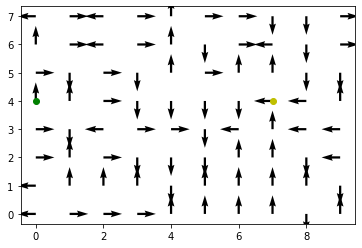

In [21]:
x1,y1 = np.meshgrid(np.arange(0, 10, 1), np.arange(0, 8, 1))
u = np.zeros(y1.shape)
v = np.zeros(y1.shape)
for i in range(10):
    for j in range(8):
        if policy[(i,j)]=="UP":
            u[j,i]=0
            v[j,i]=0.1
        elif policy[(i,j)]=="DOWN":
            u[j,i]=0
            v[j,i]=-0.1
        elif policy[(i,j)]=="RIGHT":
            u[j,i]=0.1
            v[j,i]=0
        elif policy[(i,j)]=="LEFT":
            u[j,i]=-0.1
            v[j,i]=0
        else:
            print("UNKNOWN ACTION",policy[(i,j)])


plt.quiver(x1,y1,u,v)
plt.plot(0,4,"go")
plt.plot(7,4,"yo")